In [1]:
import keras as kr
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sea
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer as Enc

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data 

In [3]:
mnist = input_data.read_data_sets('data', validation_size= 0)
X = mnist.train.images
Y = mnist.train.labels


Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [6]:
enc = Enc()
y = enc.fit_transform(Y.reshape(-1, 1))

In [7]:
def show_image(image):
    x = image * 256
    im = Image.fromarray(x.reshape((28,28)))
    return im.convert('RGB')

In [96]:
def train(model, epochs =1 ):
    callbacks = model.fit(X, y,batch_size = 32,epochs = epochs, verbose= 1, validation_data= (mnist.test.images, enc.transform(mnist.test.labels.reshape(-1, 1)) ) )
    result = pd.DataFrame(callbacks.history)
    return result

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.1411 - acc: 0.9470 - val_loss: 0.0609 - val_acc: 0.9811
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1105 - acc: 0.9585 - val_loss: 0.0514 - val_acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1042 - acc: 0.9612 - val_loss: 0.0491 - val_acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1003 - acc: 0.9627 - val_loss: 0.0472 - val_acc: 0.9849
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0981 - acc: 0.9639 - val_loss: 0.0450 - val_acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0961 - acc: 0.9646 - val_loss: 0.0444 - val_acc: 0.9854: 0s - loss: 0.09
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0949 - acc: 0.9652 - val_loss:

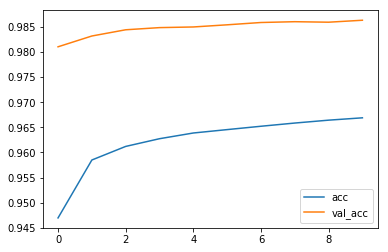

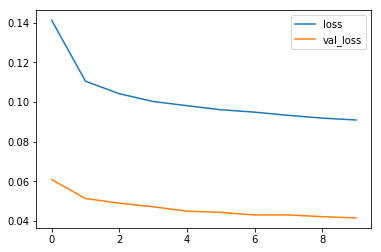

In [113]:
def create_model(first = 128):
    model = kr.Sequential()
    model.add(kr.layers.Dense(first, input_shape = [X.shape[1]], activation = 'relu'))
    model.add(kr.layers.Dropout(0.4))
    model.add(kr.layers.Dense((y.shape[1]), activation=    'softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(16)
test = train(model, 10)
test[['acc', 'val_acc']].plot()
plt.show()
test[['loss', 'val_loss']].plot()
plt.show()

In [98]:
def predict(image_location, X):
    prediction = model.predict(X[image_location: image_location + 1])
    word = enc.inverse_transform(prediction)
    print(word[0])
    return show_image(X[image_location])

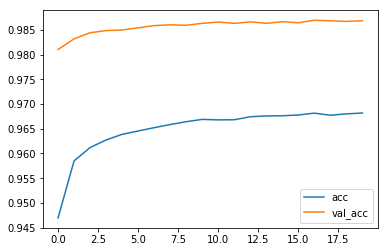

In [118]:
test[['acc', 'val_acc']].plot()
plt.show()

In [116]:
predict(63, mnist.test.images)

3
